# Basic Monte Carlo 

##### Keywords: sampling, rejection sampling, integration, lotus, law of large numbers, monte-carlo, expectations

## Contents
{:.no_toc}
* 
{: toc}

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

## Monte Carlo

The basic idea of a Monte Carlo Algorithm is to use randomness to solve what is often a deterministic problem. For instance, finding the probability of a a poker hand occuring (or winning) simply by simulating games and counting.

In this course, we'll study the aplication of Monte Carlo approaches application in three different places: optimization, integration, and obtaining draws from a probability distribution. These uses are often intertwined: optimization is needed to find modes of distributions and integration is needed to summarize distributions.

Wikipedia has a facinating bit of [history](https://en.wikipedia.org/wiki/Monte_Carlo_method) on the subject, from which I quote:

>The first thoughts and attempts I made to practice [the Monte Carlo Method] were suggested by a question which occurred to me in 1946 as I was convalescing from an illness and playing solitaires. The question was what are the chances that a Canfield solitaire laid out with 52 cards will come out successfully? After spending a lot of time trying to estimate them by pure combinatorial calculations, I wondered whether a more practical method than "abstract thinking" might not be to lay it out say one hundred times and simply observe and count the number of successful plays. This was already possible to envisage with the beginning of the new era of fast computers, and I immediately thought of problems of neutron diffusion and other questions of mathematical physics, and more generally how to change processes described by certain differential equations into an equivalent form interpretable as a succession of random operations. Later [in 1946], I described the idea to John von Neumann, and we began to plan actual calculations.
–Stanislaw Ulam

>Being secret, the work of von Neumann and Ulam required a code name.[citation needed] A colleague of von Neumann and Ulam, Nicholas Metropolis, suggested using the name Monte Carlo, which refers to the Monte Carlo Casino in Monaco where Ulam's uncle would borrow money from relatives to gamble.

## Poker Hands
First, in the spirit of Monte Carlo, we'll estimate the probability of getting a three-of-a-kind in a 5-card poker hand.

Instead of the combinatroic calculation, we simply need to write a program to generate 5-card hands and count what percentage of hands contain three of the same number.

In [57]:
from collections import Counter

#the components for a deck of cards
suits = ['h','d','c','s']
values= ['2','3','4','5','6','7','8','9','10','J','Q','K','A']

#we don't care about suits for this problem, so we'll ignore them
#this is just the values 2:A repeated four times.
deck=[value for suit in suits for value in values]

#set up counters
num_tripples=0
total_reps = 10000

#monte carlo: draw hands and see if there's three-of-a-kind
for rep in range(total_reps):
    hand=np.random.choice(deck,5, replace=False)
    value_counts=Counter(hand).values()
    #if we see 3 of the same card it's a triple, unless there is
    #a pair present was well (that would be a full house)
    if 3 in value_counts and (2 not in value_counts):
        num_tripples+=1
        
print("Tiples/Total:",num_tripples/total_reps)
print("Theoretical value:",.021128)


Tiples/Total: 0.0216
Theoretical value: 0.021128


We've approximated the true value with a little more than 5 minutes of coding time, and (we'll learn) we can make the estimate arbitrarially precise and accurate by increasing the run time.

The advantage of MCMC in probability calculations becomes clear with complex events like "three of a kind is the best hand at the table". The combinatoric argument would be very complex, but the simulation is straightforward.

## Estimate the value of $\pi$

Some quantities of interest don't seem like probabilites vulnerable to MC estimation, but can, in fact, be cast that way. For instance, a Monte Carlo approach can be used to approximate the value of $\pi$

To see why: If you could uniformly generate random numbers on a square, you could ask, how many of these numbers would fall inside a unit circle embedded in and touching the midpoints of the sides of the square. This ratio would be

$$\frac{Circle\ Area}{Square\ Area}=\frac{\pi \cdot 1^2}{2^2} = \frac{\pi}{4}.$$

So multiplying that ratio by 4 gives an estimate of $\pi$.

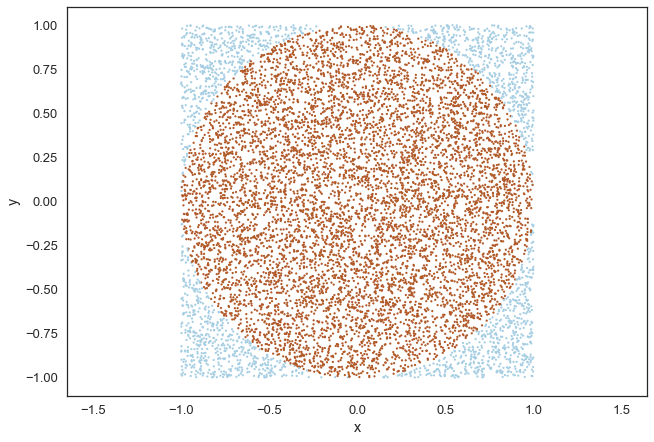

Estimate of pi =  3.132
True value of pi =  3.141592653589793


In [60]:
#area of the bounding box
box_area = 4.0    

#number of samples
N_total = 10000

#drawing random points uniform between -1 and 1
X = np.random.uniform(low=-1, high=1, size=N_total)  
Y = np.random.uniform(low=-1, high=1, size=N_total)   

# calculate the distance of the points from the center 
distance = np.sqrt(X**2+Y**2);  
 
# check if point is inside the circle    
is_point_inside = distance<1.0

# sum up the hits inside the circle
N_inside=np.sum(is_point_inside)

# estimate the circle area
circle_area = box_area * N_inside/N_total

# some nice visualization
plt.scatter(X,Y, c=is_point_inside, s=5.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# text output
print("Estimate of pi = ", circle_area)
print("True value of pi = ", np.pi)

Intuitively, one might expect our estimate of $\pi$ to get better as we draw more and more samples: we'll start to saturate the square and get a better sense of the true area.

Let's think through the mathematics and the intuition which tells us that we can calculate $\pi$ in this way.

#### Simulation as 
The process we're running is tossing down points uniformly distributed on the square and scoring 1 if they fall inside the circle and zero otherwise. Then we divide by the total number of points (and reverse-engineer pi from the value calculated, but ignore that). This process is the same as having a list of 1s and 0s, totaling the list and dividing by the number of elements. So we can think of our process as being an average or more generally an expected value of lots of random outcomes.

In symbols we have:

$$\lim_{n\to\infty}\sum_{i=0}^{n} I_{\in C}(x_i,y_i) = \int I_{\in C}(X,Y)\cdot f(x,y)\,dxdy = E_f[I_{\in C} (X,Y)] $$

The first equality is the idea that with more points we better approximate the true area; the second equality is just the reverse direction of the definition of the definition of expectation / LOTUS.

Further, we know from probability theory that the expected value of an indicator for an event is the probability of that event: $E_f[I_{\in C} (X,Y)] = p(X,Y \in C)$

Hence our simulate-and-count process is a finite approximation to $p(X,Y \in C)$, the probability of landing in the circle. Further, our process can be viewed as a calculating a running average/expectation, which is the domain of the Law of Large Numbers. 

We're even in a nice special case within the LLN, becuase each term in our running average (each 1 or 0) is generated in the same way, i.e. drawn from the same distribution. In this special case, the LLN says that the running average will converge to the true expected value (and so, the true probability). So, QED, with enough points thrown at the square above, the emperical calculation can be made arbitrarailly precise.

The argument above works for any simulation process, and is the reason why we can expect random methods to give 1) correct results and 2) not give results that are too differnt from run to run, provided the number of simuations is large enough. It relies on three equivalent views of what we're doing: the emperical count, an expected value, and a probability, summaraized as:

$$\lim_{n\to\infty}\sum_{i=0}^{n} I_{\in C}(x_i,y_i) = E_f[I_{\in C} (X,Y)] = p(X,Y \in C)$$

## Hit or miss method

This simple circle scenario of inside-or-outside can be used as a general (but poor, as missing increases exponentially with dimension)  way to use the generation of samples to carry out integration

![](images/hitormiss.png)

You basically generate samples from a uniform distribution with support on the rectangle and see how many fall below only count the percentage that fall below $y(x)$ (and then scale the percentage/probabiltiy back up by multiplying by the area of the rectangle).